<a href="https://colab.research.google.com/github/Senkronik/aygazyapayzeka/blob/main/aygazyapayzeka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import warnings
warnings.filterwarnings("ignore")

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [6]:
print("X_train boyutu:", X_train.shape)
print("y_train boyutu:", y_train.shape)
print("X_test boyutu:", X_test.shape)
print("y_test boyutu:", y_test.shape)

X_train boyutu: (60000, 28, 28)
y_train boyutu: (60000,)
X_test boyutu: (10000, 28, 28)
y_test boyutu: (10000,)


In [7]:
print("Görüntü boyutu:", X_train[0].shape)

Görüntü boyutu: (28, 28)


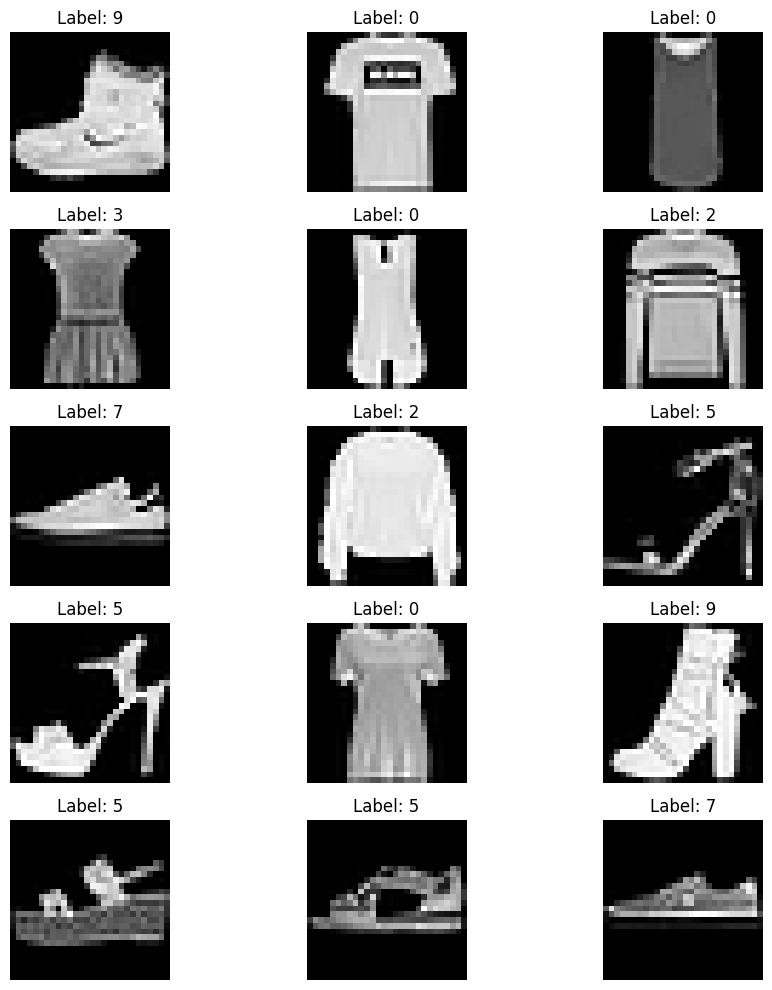

In [8]:
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

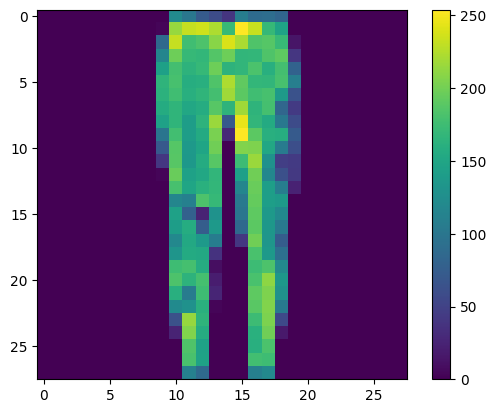

In [9]:
plt.figure()
plt.imshow(X_train[78])
plt.colorbar()
plt.grid(False)
plt.show()

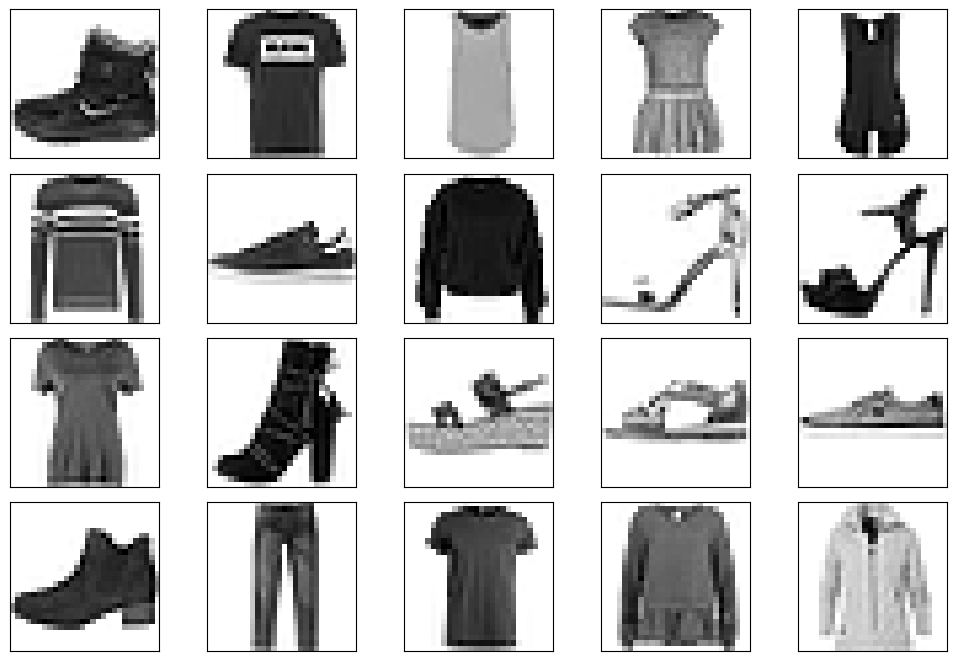

In [10]:
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(6, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.tight_layout()
plt.show()

In [11]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [12]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [13]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Görüntüyü düzleştir
    Dense(128, activation='relu'),  # Gizli katman
    Dense(10, activation='softmax')  # Çıkış katmanı
])

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5200 - accuracy: 0.8180 - val_loss: 0.4144 - val_accuracy: 0.8535
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3895 - accuracy: 0.8600 - val_loss: 0.3986 - val_accuracy: 0.8571
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3486 - accuracy: 0.8737 - val_loss: 0.3605 - val_accuracy: 0.8641
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3247 - accuracy: 0.8801 - val_loss: 0.3578 - val_accuracy: 0.8702
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3041 - accuracy: 0.8871 - val_loss: 0.3515 - val_accuracy: 0.8768
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2859 - accuracy: 0.8947 - val_loss: 0.3395 - val_accuracy: 0.8782
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2720 - accuracy: 0.8994 - val_loss: 0.3414 - val_accuracy:

In [16]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

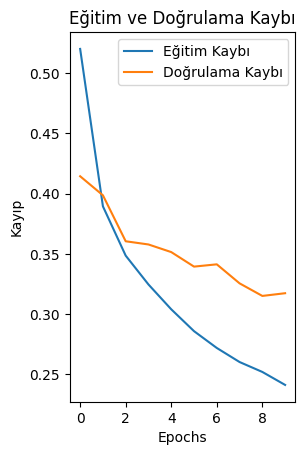

In [17]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Kayıp')
plt.legend()

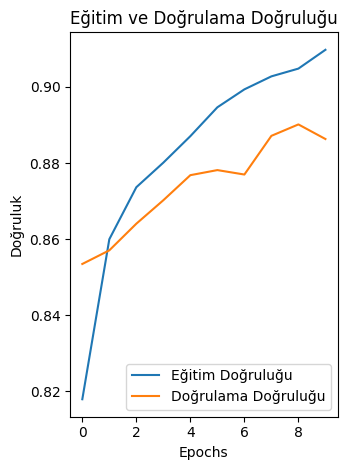

In [18]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test kaybı: {test_loss}")
print(f"Test doğruluğu: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3485 - accuracy: 0.8809
Test kaybı: 0.34845513105392456
Test doğruluğu: 0.8809000253677368


In [20]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train_flat, y_train)

RandomForestClassifier()

In [22]:
y_pred_rf = rf.predict(X_test_flat)

In [23]:
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')

print(f'Random Forest Doğruluk (Accuracy): {acc_rf:.4f}')
print(f'Random Forest F1 Skoru: {f1_rf:.4f}')
print(f'Random Forest Geri Çağırma (Recall): {recall_rf:.4f}')
print(f'Random Forest Kesinlik (Precision): {precision_rf:.4f}')


Random Forest Doğruluk (Accuracy): 0.8757
Random Forest F1 Skoru: 0.8743
Random Forest Geri Çağırma (Recall): 0.8757
Random Forest Kesinlik (Precision): 0.8747


In [24]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

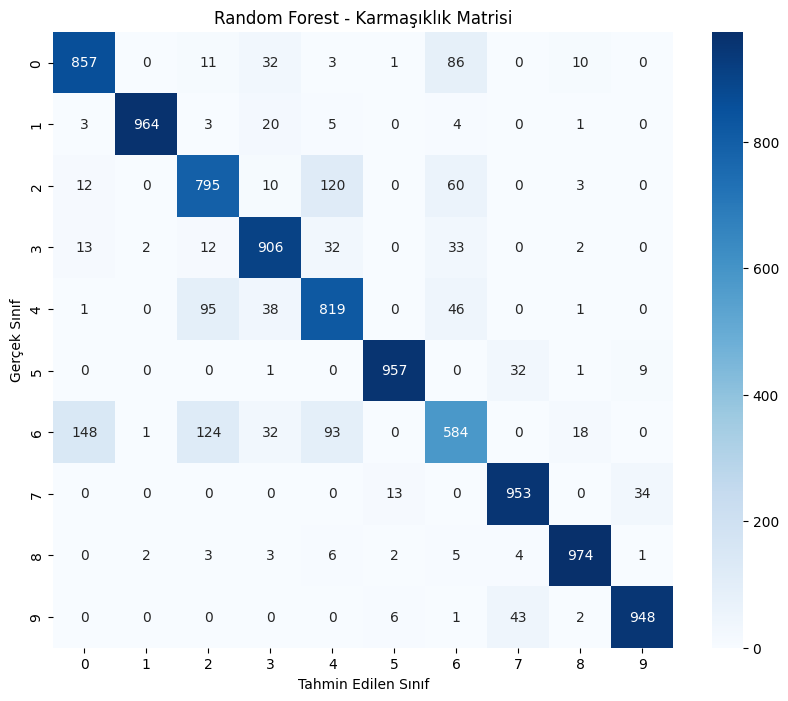

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Random Forest - Karmaşıklık Matrisi')
plt.show()

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train_flat, y_train)

DecisionTreeClassifier()

In [27]:
y_pred_dt = dt.predict(X_test_flat)

In [28]:
acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')

print(f'Decision Tree Doğruluk (Accuracy): {acc_dt:.4f}')
print(f'Decision Tree F1 Skoru: {f1_dt:.4f}')
print(f'Decision Tree Geri Çağırma (Recall): {recall_dt:.4f}')
print(f'Decision Tree Kesinlik (Precision): {precision_dt:.4f}')

Decision Tree Doğruluk (Accuracy): 0.7910
Decision Tree F1 Skoru: 0.7915
Decision Tree Geri Çağırma (Recall): 0.7910
Decision Tree Kesinlik (Precision): 0.7922


In [29]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

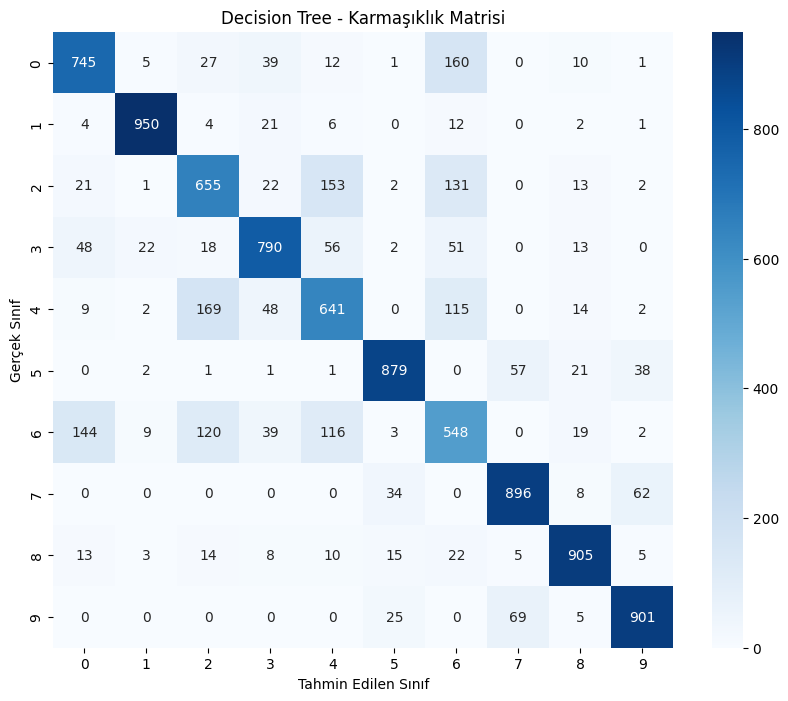

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Decision Tree - Karmaşıklık Matrisi')
plt.show()